In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [29]:
pd.set_option('display.max_columns', None)

In [30]:
# import the data
df = pd.read_csv("DataTransformed.csv")
df.head()

,Unnamed: 0,dansk_navn,id,slaegtsnavn,slaegtsnavn_eng,bydelsnavn,wkb_geometry,planteaar
0,0,Storbladet lind,18611,Lind,Linden,Vesterbro,POINT (12.5370471883976 55.6486340745573),1953.0
1,1,Storbladet lind,21291,Lind,Linden,Vesterbro,POINT (12.536925020477707 55.64867988581558),1953.0
2,2,Storbladet lind,21292,Lind,Linden,Vesterbro,POINT (12.537000905330974 55.64876361021244),1953.0
3,3,Storbladet lind,21293,Lind,Linden,Vesterbro,POINT (12.537133269649273 55.64872321507861),1953.0
4,4,Storbladet lind,21294,Lind,Linden,Vesterbro,POINT (12.537399549194998 55.648992732825036),1953.0


- Undersøg befolknings tæthed kontra antal træer
- Undersøg indkomst kontra antal træer
- Træer pr. areal
- Kan man undersøge biodiversiteten på en eller anden måde? NOget med antal forskellige træer med mere edn 10 træer pr by del måske?

## Befolknings tæthed

Find data for the population of each district and merge into temporary dataframe

In [31]:
## Befolkning pr. 31 jan 2019: https://statistikbanken.kk.dk/1050dc07-e88c-4206-ae4e-645718e26ab9/ReportSection
district1 = ['Indre By', 'Østerbro','Nørrebro','Vesterbro','Valby','Vanløse',
        'Brønshøj-Husum','Bispebjerg','Amager Øst','Amager Vest']

population = [55866,79803,80254,72688,60308,41195,44784,55172,59803,78973]

temp1 = pd.DataFrame({'district':district1,'population':population})

Find the data of the average yearly income and merge into temporary dataframe

In [32]:
## Gnm. indkomst, 2017
## Fra 'Status på København 2019' pdf'en

district2 = ['Brønshøj-Husum','Bispebjerg','Østerbro','Vanløse','Nørrebro',
        'Indre By','Valby','Vesterbro','Amager Vest',
        'Amager Øst']

income = [213,182,247,234,187,286,217,219,229,217] ## gennemsnitlig disponibel indkomst i 1000 kr. 

temp2 = pd.DataFrame({'district':district2,'income':income})

Find the area of the districts.

In [33]:
district3 = ['Indre By','Østerbro','Nørrebro','Vesterbro','Valby',
            'Vanløse','Brønshøj-Husum','Bispebjerg','Amager Øst','Amager Vest']

area = [9,8.7,4.1,8.2,9.2,6.7,8.7,6.8,9.1,19.2] # area in km^2

temp3 = pd.DataFrame({'district':district3,'area':area})

Get the tree counts and merge everything into a combined dataframe ``df2``

In [34]:
## The tree counts
trees = df.groupby(['bydelsnavn']).count().id
temp4 = pd.DataFrame({'district':trees.index,'trees':trees.values})

temp11 = pd.merge(temp1,temp2,on='district')
temp22 = pd.merge(temp11,temp3,on='district')
df2 = pd.merge(temp22,temp4,on='district')
df2 = df2.sort_values('district', ascending=True) # Sort alphabetically
df2

,district,population,income,area,trees
9,Amager Vest,78973,229,19.2,4477
8,Amager Øst,59803,217,9.1,3930
7,Bispebjerg,55172,182,6.8,8268
6,Brønshøj-Husum,44784,213,8.7,4149
0,Indre By,55866,286,9.0,6105
2,Nørrebro,80254,187,4.1,6769
4,Valby,60308,217,9.2,4878
5,Vanløse,41195,234,6.7,3915
3,Vesterbro,72688,219,8.2,6710
1,Østerbro,79803,247,8.7,7815


Construct the column ``popRatio`` which indicates how many trees there are pr. citizen in a district, the column ``areaRatio`` which indicate the amount of trees pr. $km^2$ and the column ``incomeRatio`` which indicates the amount of trees pr. 1000 DKK income.

In [35]:
df2['popRatio'] = df2['trees']/(df2['population'])
df2['areaRatio'] = df2['trees']/df2['area']
df2['incomeRatio'] = df2['trees']/df2['income']
df2

,district,population,income,area,trees,popRatio,areaRatio,incomeRatio
9,Amager Vest,78973,229,19.2,4477,0.056690,233.177083,19.550218
8,Amager Øst,59803,217,9.1,3930,0.065716,431.868132,18.110599
7,Bispebjerg,55172,182,6.8,8268,0.149859,1215.882353,45.428571
6,Brønshøj-Husum,44784,213,8.7,4149,0.092645,476.896552,19.478873
0,Indre By,55866,286,9.0,6105,0.109279,678.333333,21.346154
2,Nørrebro,80254,187,4.1,6769,0.084345,1650.975610,36.197861
4,Valby,60308,217,9.2,4878,0.080885,530.217391,22.479263
5,Vanløse,41195,234,6.7,3915,0.095036,584.328358,16.730769
3,Vesterbro,72688,219,8.2,6710,0.092312,818.292683,30.639269
1,Østerbro,79803,247,8.7,7815,0.097929,898.275862,31.639676


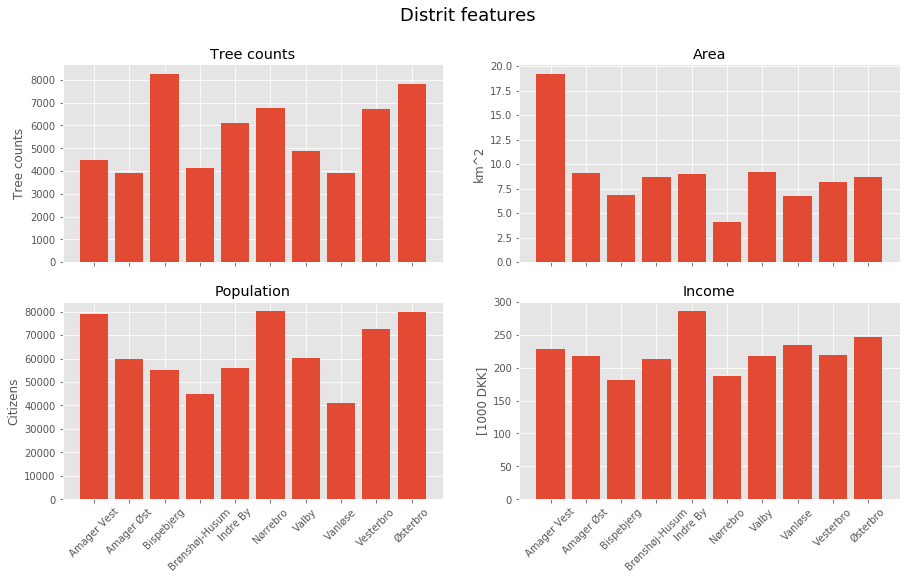

In [36]:
# Figure size
plt.rcParams['figure.figsize'] = (15, 8)

fig, axs = plt.subplots(2,2,sharex = 'col')
# Tree counts
axs[0,0].bar(df2['district'],df2['trees'])
axs[0,0].set_title("Tree counts")
axs[0,0].set_ylabel('Tree counts')
# Area ratio
axs[0,1].bar(df2['district'],df2['area'])
axs[0,1].set_title("Area")
axs[0,1].set_ylabel("km^2")
# Population ratio
axs[1,0].bar(df2['district'],df2['population'])
axs[1,0].set_title("Population")
axs[1,0].set_ylabel("Citizens")
# Income ratio
axs[1,1].bar(df2['district'],df2['income'])
axs[1,1].set_title('Income')
axs[1,1].set_ylabel("[1000 DKK]")

axs[1,0].tick_params('x',labelrotation=45)
axs[1,1].tick_params('x',labelrotation=45)
plt.suptitle('Distrit features', size = 18)
plt.show()

In [37]:
# Function which adds percentage to the string
def addPercentage(x):
    return(("{}{}".format(x,"%")))

In [38]:
# Population
df2['Population'] = (df2.population/sum(df2.population))*100
df2['Population'] = round(df2['Population'],1)
#df2['popPercStr'] = df2.popPerc.apply(addPercentage)
# Area
df2['Area'] = (df2.area/sum(df2.area))*100
df2['Area'] = round(df2['Area'],1)
#df2['areaPercStr'] = df2.areaPerc.apply(addPercentage)
# Trees
df2['Trees'] = (df2.trees/sum(df2.trees))*100
df2['Trees'] = round(df2['Trees'],1)
#df2['treesPercStr'] = df2.treesPerc.apply(addPercentage)
df2

,district,population,income,area,trees,popRatio,areaRatio,incomeRatio,Population,Area,Trees
9,Amager Vest,78973,229,19.2,4477,0.056690,233.177083,19.550218,12.6,21.4,7.9
8,Amager Øst,59803,217,9.1,3930,0.065716,431.868132,18.110599,9.5,10.1,6.9
7,Bispebjerg,55172,182,6.8,8268,0.149859,1215.882353,45.428571,8.8,7.6,14.5
6,Brønshøj-Husum,44784,213,8.7,4149,0.092645,476.896552,19.478873,7.1,9.7,7.3
0,Indre By,55866,286,9.0,6105,0.109279,678.333333,21.346154,8.9,10.0,10.7
2,Nørrebro,80254,187,4.1,6769,0.084345,1650.975610,36.197861,12.8,4.6,11.9
4,Valby,60308,217,9.2,4878,0.080885,530.217391,22.479263,9.6,10.3,8.6
5,Vanløse,41195,234,6.7,3915,0.095036,584.328358,16.730769,6.6,7.5,6.9
3,Vesterbro,72688,219,8.2,6710,0.092312,818.292683,30.639269,11.6,9.1,11.8
1,Østerbro,79803,247,8.7,7815,0.097929,898.275862,31.639676,12.7,9.7,13.7


In [39]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import Legend
from bokeh.palettes import all_palettes
output_notebook(resources=None, verbose=False, hide_banner=False, load_timeout=5000, notebook_type='jupyter')
from bokeh.models import ColumnDataSource, ranges, LabelSet, HoverTool

Loading BokehJS ...

In [40]:
#source = ColumnDataSource(data=dict(district=df2.district,
 #                                  popPerc=df2.popPerc,
  #                                 popPercStr=df2.popPercStr))

In [41]:
'''
# Figure
b1 = figure(x_range=df2.district,plot_height=300,plot_width=500,
           y_range= ranges.Range1d(start=0,end=15),
           title="Population of Copenhagen")

# Bar chart
b1.vbar(x='district',top='popPerc',source = df2,width=0.9)

# remove the grid
b1.xgrid.grid_line_color=None
b1.ygrid.grid_line_color=None
# Make sure bars stat at 0
b1.y_range.start = 0
# Turn the x-labels
b1.xaxis.major_label_orientation = 0.5
# remove - y-axis
b1.yaxis.visible = False
# Remove the toolbar
b1.toolbar_location=None
# Remove the grey box around the plot
b1.outline_line_color = None

# add labels
labels = LabelSet(x='district', y='popPerc', text='popPercStr', level='glyph',
        x_offset=-20, y_offset=0, source=source, render_mode='canvas')

# add hover tool
b1.add_tools(HoverTool(tooltips = [('Population','@population')]))

b1.add_layout(labels)
show(b1)
'''

'\n# Figure\nb1 = figure(x_range=df2.district,plot_height=300,plot_width=500,\n           y_range= ranges.Range1d(start=0,end=15),\n           title="Population of Copenhagen")\n\n# Bar chart\nb1.vbar(x=\'district\',top=\'popPerc\',source = df2,width=0.9)\n\n# remove the grid\nb1.xgrid.grid_line_color=None\nb1.ygrid.grid_line_color=None\n# Make sure bars stat at 0\nb1.y_range.start = 0\n# Turn the x-labels\nb1.xaxis.major_label_orientation = 0.5\n# remove - y-axis\nb1.yaxis.visible = False\n# Remove the toolbar\nb1.toolbar_location=None\n# Remove the grey box around the plot\nb1.outline_line_color = None\n\n# add labels\nlabels = LabelSet(x=\'district\', y=\'popPerc\', text=\'popPercStr\', level=\'glyph\',\n        x_offset=-20, y_offset=0, source=source, render_mode=\'canvas\')\n\n# add hover tool\nb1.add_tools(HoverTool(tooltips = [(\'Population\',\'@population\')]))\n\nb1.add_layout(labels)\nshow(b1)\n'

In [42]:
all_palettes['BuGn'][5][0:3]

('#006d2c', '#2ca25f', '#66c2a4')

In [59]:
p = figure(x_range=df2.district,plot_height=400,plot_width=650,
           y_range= ranges.Range1d(start=0,end=25))
# remove the grid
p.xgrid.grid_line_color=None
p.ygrid.grid_line_color=None
# Make sure bars stat at 0
p.y_range.start = 0
# Turn the x-labels
p.xaxis.major_label_orientation = 0.5
# remove - y-axis
p.yaxis.visible = False
# Remove the toolbar
p.toolbar_location=None
# Remove the grey box around the plot
p.outline_line_color = None
# Colors and others
colors = ['#C5D699','#99BC66','#578300','#344F00','#1b3512']
bar = {}
items = []
color = 0
features = ['Area','Population','Trees']
for indx,i in enumerate(features):
    bar[i] = p.vbar(x='district', top=i, source=df2, muted_alpha=0, muted=False,
                   width= 0.8, color=colors[color])
    items.append((i,[bar[i]]))
    color+=1
# Define legend
legend = Legend(items=items,location=(0,50))
# Add the hover tools - different for each item
p.add_tools(HoverTool(renderers=[items[1][1][0]], tooltips = [('Area','@area{0.0} km² (@Area{0.0}%)')]))
p.add_tools(HoverTool(renderers=[items[0][1][0]], tooltips = [('Population','@population (@Population{0.0}%)')]))
p.add_tools(HoverTool(renderers=[items[2][1][0]], tooltips = [('Trees','@trees (@Trees{0.0}%)')]))

# Set which bars to be invisible at the start
bar['Population'].visible = False
bar['Area'].visible = False

p.add_layout(legend,'left')
p.legend.click_policy='hide'
show(p)

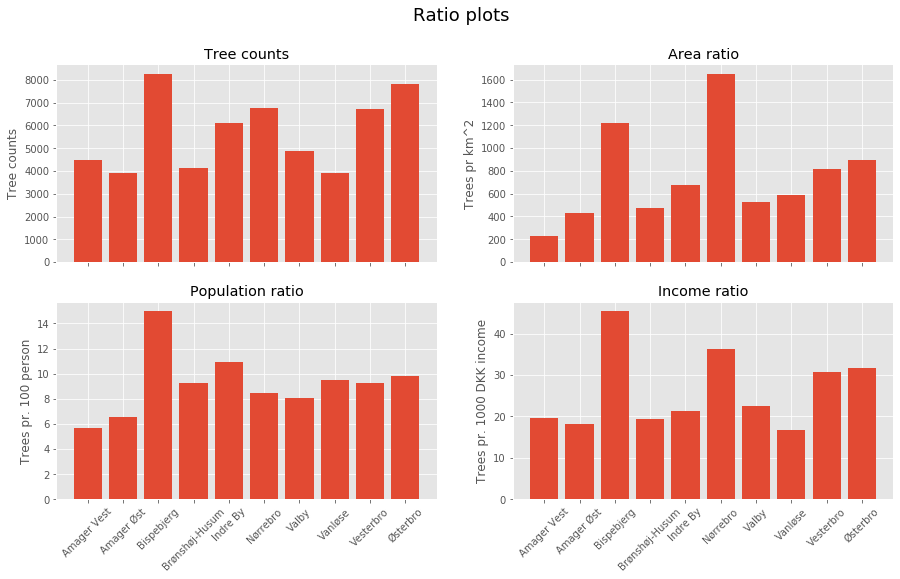

In [44]:
# Figure size
plt.rcParams['figure.figsize'] = (15, 8)

fig, axs = plt.subplots(2,2,sharex = 'col')
# Tree counts
axs[0,0].bar(df2['district'],df2['trees'])
axs[0,0].set_title("Tree counts")
axs[0,0].set_ylabel('Tree counts')
# Area ratio
axs[0,1].bar(df2['district'],df2['areaRatio'])
axs[0,1].set_title("Area ratio")
axs[0,1].set_ylabel("Trees pr km^2")
# Population ratio
axs[1,0].bar(df2['district'],df2['popRatio']*100)
axs[1,0].set_title("Population ratio")
axs[1,0].set_ylabel("Trees pr. 100 person")
# Income ratio
axs[1,1].bar(df2['district'],df2['incomeRatio'])
axs[1,1].set_title('Income ratio')
axs[1,1].set_ylabel("Trees pr. 1000 DKK income")

axs[1,0].tick_params('x',labelrotation=45)
axs[1,1].tick_params('x',labelrotation=45)
plt.suptitle('Ratio plots', size = 18)
plt.show()

In [45]:
df2['popRatio'] = df2['popRatio']*100
df2

,district,population,income,area,trees,popRatio,areaRatio,incomeRatio,Population,Area,Trees
9,Amager Vest,78973,229,19.2,4477,5.669026,233.177083,19.550218,12.6,21.4,7.9
8,Amager Øst,59803,217,9.1,3930,6.571577,431.868132,18.110599,9.5,10.1,6.9
7,Bispebjerg,55172,182,6.8,8268,14.985862,1215.882353,45.428571,8.8,7.6,14.5
6,Brønshøj-Husum,44784,213,8.7,4149,9.264469,476.896552,19.478873,7.1,9.7,7.3
0,Indre By,55866,286,9.0,6105,10.927935,678.333333,21.346154,8.9,10.0,10.7
2,Nørrebro,80254,187,4.1,6769,8.434471,1650.975610,36.197861,12.8,4.6,11.9
4,Valby,60308,217,9.2,4878,8.088479,530.217391,22.479263,9.6,10.3,8.6
5,Vanløse,41195,234,6.7,3915,9.503581,584.328358,16.730769,6.6,7.5,6.9
3,Vesterbro,72688,219,8.2,6710,9.231235,818.292683,30.639269,11.6,9.1,11.8
1,Østerbro,79803,247,8.7,7815,9.792865,898.275862,31.639676,12.7,9.7,13.7


In [51]:
# Plot for popRatio
source1 = ColumnDataSource(data=dict(district=df2.district,
                                   popRatio=df2.popRatio,
                                   popRatioStr=round(df2.popRatio,1)))

# Figure
p1 = figure(x_range=df2.district,plot_height=300,plot_width=500,
           y_range= ranges.Range1d(start=0,end=17),
           title="Trees pr. 100 person")

# Bar chart
colorcode_BBC = ['#C5D699','#99BC66','#578300','#344F00','#1b3512']
color = colorcode_BBC[2]
p1.vbar(x='district',top='popRatio',source = df2,width=0.9,color=color)

# remove the grid
p1.xgrid.grid_line_color=None
p1.ygrid.grid_line_color=None
# Make sure bars stat at 0
p1.y_range.start = 0
# Turn the x-labels
p1.xaxis.major_label_orientation = 0.5
# remove - y-axis
p1.yaxis.visible = False
# Remove the toolbar
p1.toolbar_location=None
# Remove the grey box around the plot
p1.outline_line_color = None
# Move the border of the left side to show "Amager"
p1.min_border_left = 30

# add labels
labels1 = LabelSet(x='district', y='popRatio', text='popRatioStr', level='glyph',
                  x_offset=-15, y_offset=0, source=source1, render_mode='canvas',
                  text_font_size="14pt")

# add hover tool
p1.add_tools(HoverTool(tooltips = [('Trees pr. 100 persons','@popRatio{0.0}')]))

p1.add_layout(labels1)
show(p1)

In [52]:
# Plot for areaRatio

source2 = ColumnDataSource(data=dict(district=df2.district,
                                   areaRatio=df2.areaRatio,
                                   areaRatioStr=round(df2.areaRatio,0)))

# Figure
p2 = figure(x_range=df2.district,plot_height=300,plot_width=500,
           y_range= ranges.Range1d(start=0,end=1800),
           title="Trees pr. km²")

# Bar chart
p2.vbar(x='district',top='areaRatio',source = df2,width=0.9,color=color)

# remove the grid
p2.xgrid.grid_line_color=None
p2.ygrid.grid_line_color=None
# Make sure bars stat at 0
p2.y_range.start = 0
# Turn the x-labels
p2.xaxis.major_label_orientation = 0.5
# remove - y-axis
p2.yaxis.visible = False
# Remove the toolbar
p2.toolbar_location=None
# Remove the grey box around the plot
p2.outline_line_color = None
# Move the border of the left side to show "Amager"
p2.min_border_left = 30

# add labels
labels2 = LabelSet(x='district', y='areaRatio', text='areaRatioStr', level='glyph',
                  x_offset=-20, y_offset=0, source=source2, render_mode='canvas',
                  text_font_size="14pt")

# add hover tool
p2.add_tools(HoverTool(tooltips = [('Trees pr. km²','@areaRatio{0.0}')]))

p2.add_layout(labels2)
show(p2)

Show the two plots together

In [53]:
from bokeh.layouts import column
show(column(p1,p2))

Findings:
- The city part with most trees is Østerbro and Bispebjerg, however if you want to live in a place where there are meny trees close to you the best place is Nørrebro. 
- If you want to have the trees to youself the best place to life is Bispebjerg
- From the graphs it appears the Amager Vest is the worst place, however this is because it is only street trees and parks. The big green area in amager is not accuonted for here.

## Uden tal i

In [54]:
# Plot for popRatio
# Figure
p1 = figure(x_range=df2.district,plot_height=300,plot_width=500,
           y_range= ranges.Range1d(start=0,end=17),
           title="Trees pr. 100 person")

# Bar chart
colorcode_BBC = ['#C5D699','#99BC66','#578300','#344F00','#1b3512']
color = colorcode_BBC[2]
p1.vbar(x='district',top='popRatio',source = df2,width=0.9,color=color)

# remove the grid
p1.xgrid.grid_line_color=None
p1.ygrid.grid_line_color=None
# Make sure bars stat at 0
p1.y_range.start = 0
# Turn the x-labels
p1.xaxis.major_label_orientation = 0.5
# remove - y-axis
p1.yaxis.visible = False
# Remove the toolbar
p1.toolbar_location=None
# Remove the grey box around the plot
p1.outline_line_color = None
# Move the border of the left side to show "Amager"
p1.min_border_left = 30

# add hover tool
p1.add_tools(HoverTool(tooltips = [('Trees pr. 100 persons','@popRatio{0.0}')]))

In [55]:
# Plot for areaRatio

# Figure
p2 = figure(x_range=df2.district,plot_height=300,plot_width=500,
           y_range= ranges.Range1d(start=0,end=1800),
           title="Trees pr. km²")

# Bar chart
p2.vbar(x='district',top='areaRatio',source = df2,width=0.9,color=color)

# remove the grid
p2.xgrid.grid_line_color=None
p2.ygrid.grid_line_color=None
# Make sure bars stat at 0
p2.y_range.start = 0
# Turn the x-labels
p2.xaxis.major_label_orientation = 0.5
# remove - y-axis
p2.yaxis.visible = False
# Remove the toolbar
p2.toolbar_location=None
# Remove the grey box around the plot
p2.outline_line_color = None
# Move the border of the left side to show "Amager"
p2.min_border_left = 30

# add hover tool
p2.add_tools(HoverTool(tooltips = [('Trees pr. km²','@areaRatio{0.0}')]))

show(column(p1,p2))

## Biodiversity

In [34]:
# Dataframe with the tree counts for each district, nan is no trees of kind
temp = df.groupby(['slaegtsnavn','bydelsnavn']).count().id.unstack()

# initiate an vector
biodiv = []
# Define the districts
district = df2.district
# Loop over all districts
for dis in district:
    biodiv.append(len(temp[dis]) - temp[dis].isna().sum())
# Add to df2
df2['biodiv'] = biodiv
df2

,district,population,income,area,trees,popRatio,areaRatio,incomeRatio,biodiv
0,Indre By,55866,286,9.0,6105,0.109279,678.333333,21.346154,31
1,Østerbro,79803,247,8.7,7835,0.098179,900.574713,31.720648,53
2,Nørrebro,80254,187,4.1,6770,0.084357,1651.219512,36.203209,40
3,Vesterbro-Kongens Enghave,72688,219,8.2,6710,0.092312,818.292683,30.639269,47
4,Valby,60308,217,9.2,4878,0.080885,530.217391,22.479263,32
5,Vanløse,41195,234,6.7,3915,0.095036,584.328358,16.730769,25
6,Brønshøj-Husum,44784,213,8.7,4151,0.092689,477.126437,19.488263,20
7,Bispebjerg,55172,182,6.8,8268,0.149859,1215.882353,45.428571,39
8,Amager Øst,59803,217,9.1,3930,0.065716,431.868132,18.110599,38
9,Amager Vest,78973,229,19.2,4477,0.056690,233.177083,19.550218,25


In [35]:
df2['bioRatio'] = df2['biodiv']/(df2['trees']/1000) # Different kind of trees pr. 1000 trees

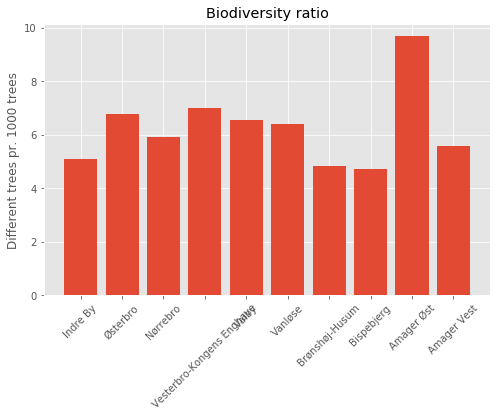

In [36]:
# Figure size
plt.rcParams['figure.figsize'] = (8,5)
plt.bar(df2['district'],df2['bioRatio'])
plt.title('Biodiversity ratio')
plt.ylabel('Different trees pr. 1000 trees')
plt.xticks(rotation=45)
plt.show()

Grafen skal måske mest bruge til at underbygge vores stacked bar chart da det kan være svært i den og se præcist hvor mange forskellige slags træer der er...

- The city part Brønshøj-Husum which before was found as the part with the fewest amount of trees is actually the most biodiverse city part with more than 17.5 different tree types pr. 1000 trees. 
- Østerbro, Bispebjerg and Indre By which were some of the districts with the most amount of trees have a much lower biodiversity than compared to Vesterbro which had a large proportion of the trees but also a large biodiversity.

In [37]:
df2

,district,population,income,area,trees,popRatio,areaRatio,incomeRatio,biodiv,bioRatio
0,Indre By,55866,286,9.0,6105,0.109279,678.333333,21.346154,31,5.077805
1,Østerbro,79803,247,8.7,7835,0.098179,900.574713,31.720648,53,6.764518
2,Nørrebro,80254,187,4.1,6770,0.084357,1651.219512,36.203209,40,5.908419
3,Vesterbro-Kongens Enghave,72688,219,8.2,6710,0.092312,818.292683,30.639269,47,7.004471
4,Valby,60308,217,9.2,4878,0.080885,530.217391,22.479263,32,6.560066
5,Vanløse,41195,234,6.7,3915,0.095036,584.328358,16.730769,25,6.385696
6,Brønshøj-Husum,44784,213,8.7,4151,0.092689,477.126437,19.488263,20,4.818116
7,Bispebjerg,55172,182,6.8,8268,0.149859,1215.882353,45.428571,39,4.716981
8,Amager Øst,59803,217,9.1,3930,0.065716,431.868132,18.110599,38,9.669211
9,Amager Vest,78973,229,19.2,4477,0.056690,233.177083,19.550218,25,5.584096


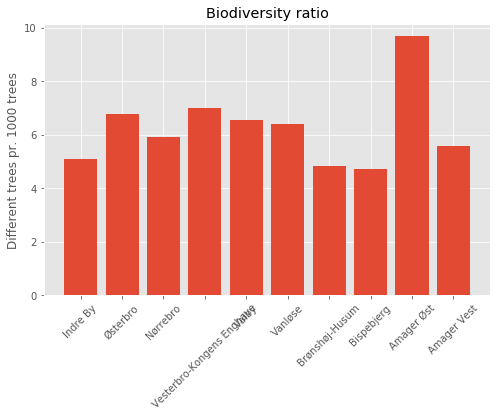

In [38]:
# Figure size
plt.rcParams['figure.figsize'] = (8,5)
plt.bar(df2['district'],df2['bioRatio'])
plt.title('Biodiversity ratio')
plt.ylabel('Different trees pr. 1000 trees')
plt.xticks(rotation=45)
plt.show()

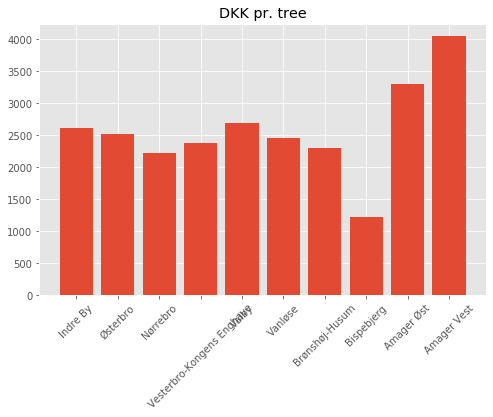

In [39]:
plt.bar(df2['district'],(df2['income']*df2['population'])/df2['trees'])
plt.title("DKK pr. tree")
plt.xticks(rotation=45)
plt.show()